In [1]:
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))

In [5]:
import plotly.express as px
import plotly.graph_objects as go
from load_data import load_data
from config import RED
import pandas as pd
from plotly.subplots import make_subplots
import plotly.io as pio

In [3]:
pio.templates.default = 'ggplot2'

In [26]:
df = load_data()
num_offenses = df.resample('M', on='OCCURRED_ON_DATE')['INCIDENT_NUMBER'].agg(counts='count').reset_index()
num_shootings = df.resample('M', on='OCCURRED_ON_DATE')['SHOOTING'].agg(num_shootings='sum').reset_index()
top10_code_groups = df.OFFENSE_CODE_GROUP.value_counts().iloc[:10].sort_values(ascending=True)
heatmap = pd.crosstab(df.HOUR, df.DAY_OF_WEEK)

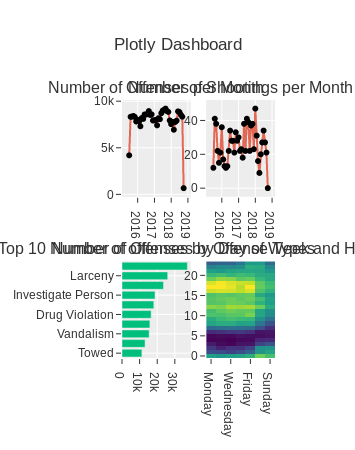

In [43]:
fig = make_subplots(rows=2, 
                    cols=2, 
                    subplot_titles=["Number of Offenses per Month", 
                                    "Number of Shootings per Month", 
                                    "Top 10 Number of offenses by Offense Types", 
                                    "Number of Offenses by Day of Week and Hour of Day"],
                   )
(fig
 .add_scatter(x=num_offenses.OCCURRED_ON_DATE, 
              y=num_offenses.counts,
              line_color=RED, 
              mode='markers+lines', 
              marker_color="black", 
              hovertemplate="Number of Offenses: %{y:0d}<extra></extra>", 
              row=1, 
              col=1)
 .add_scatter(x=num_shootings.OCCURRED_ON_DATE, 
              y=num_shootings.num_shootings, 
              line_color=RED, 
              mode='lines+markers', 
              marker_color="black", 
              hovertemplate="Number of Shootings: %{y:0d}<extra></extra>",
             row=1,
             col=2)
 .add_bar(y=top10_code_groups.index, 
          x=top10_code_groups.values, 
          orientation='h', 
          hovertemplate="Number of Offenses: %{x:.3s}<extra></extra>",
         row=2,
         col=1)
 .add_heatmap(z=heatmap.values, 
              y=heatmap.index.astype(str).to_list(), 
              x=heatmap.columns.to_list(), 
              row=2, 
              col=2, 
              colorscale='Viridis',
             hovertemplate="Hour of Day: %{y}<br \>Day of Week: %{x}<extra></extra>",
             showscale=False)
 .update_layout(showlegend=False, title_text="Plotly Dashboard")
)
fig.show()